# Построение событий SIT (ноябрь 2019 - январь 2020)

In [1]:
!pwd
!date
!ls

/home/alena/SIT/Analysis/Baselines
Пн фев 17 12:59:20 MSK 2020
Alldata0.dat   Baselines.txt.ipynb	     Parser.dat    tele.csv
Alldata.dat    Collect_baselines_data.ipynb  Parser.ipynb  Telemetry.ipynb
baselines.csv  Draw_maxevents.ipynb	     __pycache__
Baselines.txt  Draw_maxevents_old.ipynb      retina.py


In [1]:
%matplotlib inline
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib import dates
import datetime as dt

import retina

In [2]:
plt.rcParams['figure.figsize'] =(9,4)
plt.rcParams['lines.markersize'] = 2
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.max_open_warning'] = 129

In [3]:
''' Чтение файла данных '''
columns = ['event', 'Time','Up','Tmos','C','SumSig','M','Tevent','ConfL','X','Y','Phi','Theta']
for i in range(1, 62):
    columns.append("S"+str(i))
for i in range(1, 62):
    columns.append("PMT"+str(i))

filename = "Alldata.dat"
data = pd.read_csv(filename, skiprows = 1, header = None, index_col=None, sep='\s+', names=columns)
print(data.shape)
data

(631297, 135)


,event,Time,Up,Tmos,C,SumSig,M,Tevent,ConfL,X,...,PMT52,PMT53,PMT54,PMT55,PMT56,PMT57,PMT58,PMT59,PMT60,PMT61
0,57069,1569074955,28.27,17.1,1.3060,98.34,16,58.06,20.74,45.50,...,0,0,0,0,1,1,0,0,1,1
1,57070,1569074968,28.27,17.1,1.3060,109.79,18,53.40,25.54,-18.56,...,0,0,0,0,0,0,0,0,0,0
2,57071,1569074982,28.27,17.1,1.3060,130.69,14,57.24,33.39,5.91,...,0,0,0,0,0,0,0,0,0,0
3,57072,1569074982,28.25,17.0,1.3119,133.61,16,57.80,29.65,13.60,...,0,0,0,0,0,1,0,0,0,0
4,57073,1569075043,28.25,17.0,1.3119,145.33,1,58.27,36.06,-62.20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631292,1222679,1580338135,26.60,-13.2,1.7616,20.19,1,58.18,24.15,29.85,...,0,0,0,0,0,0,0,0,0,0
631293,1222680,1580338158,26.60,-13.2,1.7616,24.34,1,53.75,25.25,-46.02,...,0,0,0,0,0,0,0,0,0,0
631294,1222681,1580338245,26.60,-13.2,1.7616,26.85,1,55.56,29.09,-14.92,...,0,0,0,0,0,0,0,0,0,0
631295,1222682,1580338254,26.60,-13.2,1.7616,39.39,1,60.08,41.87,63.46,...,0,0,0,0,0,0,0,0,0,1


# Распределение событий по множественности и сумме сигналов в кадре

Построим также максимальные события с М > 40 и SigSum > 1000

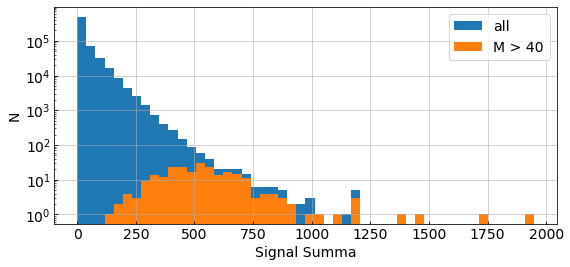

In [7]:
''' Распределение событий по сумме сигналов в кадре '''
srange = [data.SumSig.min(), data.SumSig.max()]
plt.hist(data.SumSig, log=True, bins=50, range=srange, label="all")
plt.hist(data.SumSig[(data.M > 40)], log=True, bins=50, range=srange, label="M > 40")
plt.xlabel("Signal Summa")
plt.ylabel("N")
plt.legend()
plt.grid()

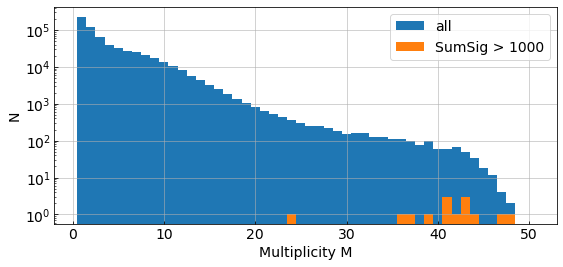

In [5]:
''' Распределение событий по множественности в кадре '''
plt.hist(data.M, bins = 50, log=True, range = (0.5,50.5), label="all")
plt.hist(data.M[(data.SumSig > 1000)], bins = 50, log=True, range = (0.5,50.5), label="SumSig > 1000")
plt.xlabel("Multiplicity M")
plt.ylabel("N")
plt.legend()
plt.grid()

In [6]:
'''  Самые большие события '''
data[(data.SumSig > 1000) & (data.M > 40)]

,event,Time,Up,Tmos,C,SumSig,M,Tevent,ConfL,X,...,PMT52,PMT53,PMT54,PMT55,PMT56,PMT57,PMT58,PMT59,PMT60,PMT61
1391,65351,1569255681,28.68,11.45,1.1497,1744.87,44,59.28,438.11,-0.71,...,1,1,0,0,1,1,0,0,1,1
1414,65489,1569256063,28.68,11.25,1.1485,1477.12,47,61.10,389.18,-1.26,...,1,1,0,0,1,1,0,0,1,1
7715,82286,1569782072,28.71,10.75,1.1381,1371.26,43,57.82,262.14,-6.77,...,1,1,0,0,0,0,0,0,1,1
23311,144716,1570478490,28.67,4.80,1.1160,1200.25,48,58.85,226.63,-4.69,...,1,1,0,0,1,1,0,0,1,1
57894,238410,1572363271,28.66,14.20,1.1706,1003.97,42,62.04,10.75,-0.63,...,1,1,0,0,1,1,0,0,0,0
79998,319646,1572898341,28.64,-2.20,1.0871,1176.61,41,57.21,81.39,-1.54,...,1,1,0,0,1,1,0,0,1,1
114438,432769,1577209923,28.53,-13.25,1.0580,1946.80,43,56.91,219.19,5.04,...,0,1,0,0,1,1,0,0,1,1
116089,435436,1577225461,28.56,-18.95,1.0254,1022.96,41,58.87,36.08,0.34,...,1,1,0,0,1,1,0,0,1,1
122573,452005,1577470420,28.42,-11.45,1.0916,1097.37,43,58.18,30.04,-2.07,...,1,1,0,0,1,1,0,0,1,1
529300,1093049,1579976946,26.61,-13.90,1.7464,1206.23,41,59.50,18.63,-3.34,...,1,1,0,0,1,0,0,0,1,1


# Самые яркие и множественные события

### Отберем 20 самых ярких событий: они оказались с (SumSig > 891) & (M > 15)

In [7]:
events1 = data.loc[data[(data.SumSig > 891) & (data.M > 15)].index].event.values
len(events1)

20

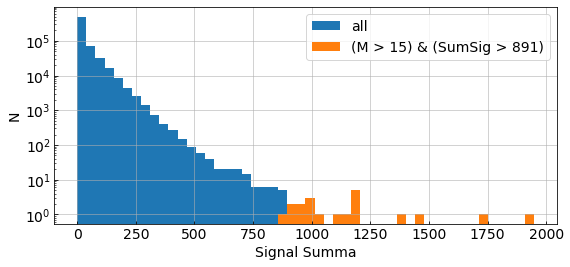

In [8]:
''' Распределение отобранных событий по сумме сигналов в кадре '''
plt.hist(data.SumSig, log=True, bins=50, range=srange, label="all")
plt.hist(data.SumSig[(data.M > 15) & (data.SumSig > 891)], log=True, bins=50, range=srange, label="(M > 15) & (SumSig > 891)")
plt.xlabel("Signal Summa")
plt.ylabel("N")
plt.legend()
plt.grid()

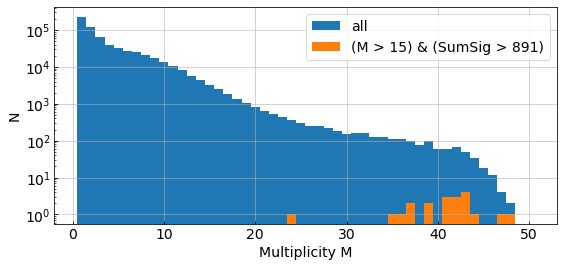

In [9]:
''' Распределение отобранных событий по множественности в кадре '''
plt.hist(data.M, bins = 50, log=True, range = (0.5,50.5), label="all")
plt.hist(data.M[(data.M > 15) & (data.SumSig > 891)], bins = 50, log=True, range = (0.5,50.5),  label="(M > 15) & (SumSig > 891)")
plt.xlabel("Multiplicity M")
plt.ylabel("N")
plt.legend()
plt.grid()

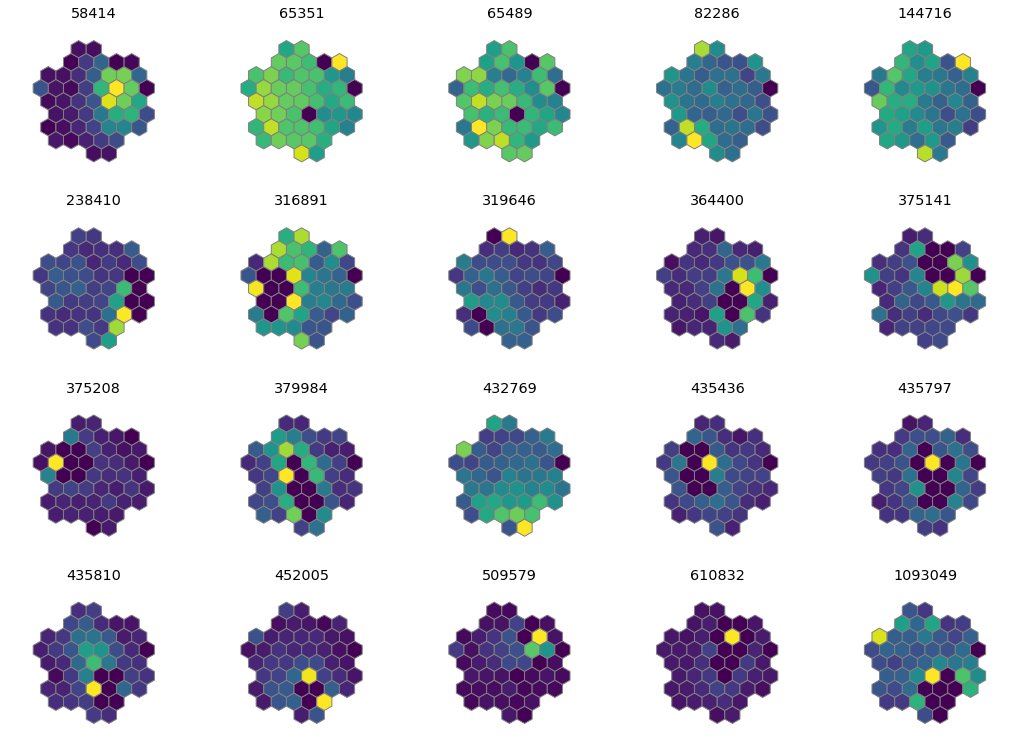

In [13]:
retina.plot_events(data, events1)

### 215 событий чуть поменьше
### C суммарным сигналом  (493 < SumSig <= 891) и множественностью (M > 15)

In [10]:
events = data.loc[data[(data.SumSig > 497) & (data.SumSig <= 891) & (data.M > 15)].index].event.values
len(events)

215

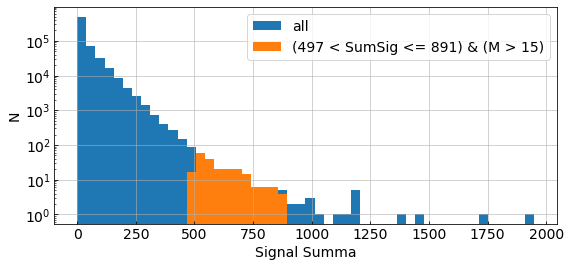

In [9]:
''' Распределение отобранных событий по сумме сигналов в кадре '''
plt.hist(data.SumSig, log=True, bins=50, range=srange, label="all")
plt.hist(data.SumSig[(data.SumSig > 497) & (data.SumSig <= 891) & (data.M > 15)], log=True, bins=50, range=srange, 
                      label="(497 < SumSig <= 891) & (M > 15)")
plt.xlabel("Signal Summa")
plt.ylabel("N")
plt.legend()
plt.grid()

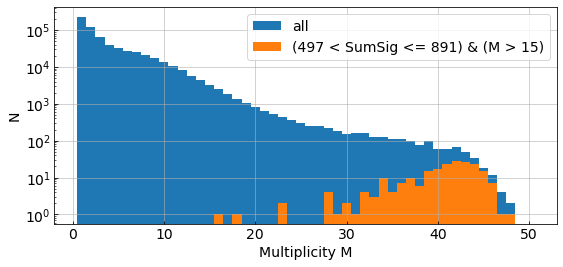

In [12]:
''' Распределение отобранных событий по множественности в кадре '''
plt.hist(data.M, bins = 50, log=True, range = (0.5,50.5), label="all")
plt.hist(data.M[(data.SumSig > 497) & (data.SumSig <= 891) & (data.M > 15)], bins = 50, log=True, range = (0.5,50.5),
        label="(497 < SumSig <= 891) & (M > 15)")
plt.xlabel("Multiplicity M")
plt.ylabel("N")
plt.legend()
plt.grid()

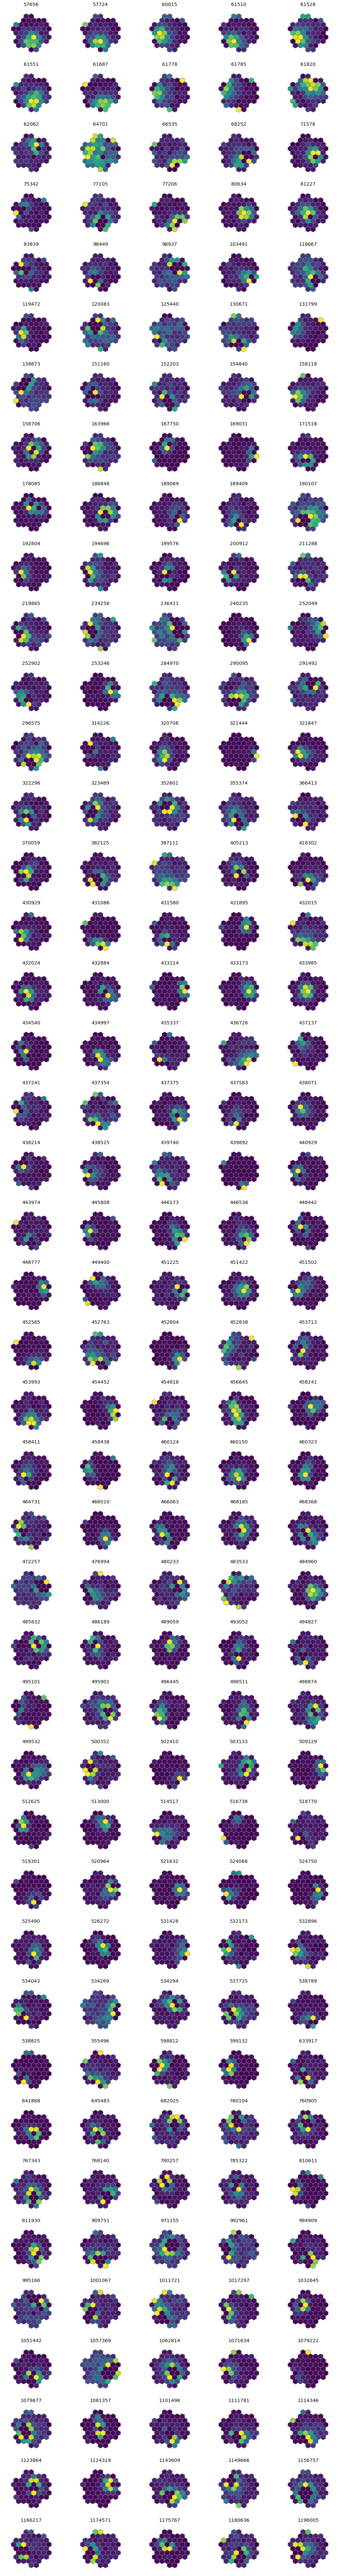

In [14]:
retina.plot_events(data, events)

## THE END